<br><br>
<font size='6'><b>Classification</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

# 1. Classification


- where $y$ is a discrete value
    - develop the classification algorithm to determine which class a new input should fall into


- start with binary class problems
    - Later look at multiclass classification problem, although this is just an extension of binary classification


- We could use linear regression
    - Then, threshold the classifier output (i.e. anything over some value is yes, else no)
    - linear regression with thresholding seems to work   


- We will learn
    - perceptron
    - logistic regression

# 2. Perceptron

- For input $x = \begin{bmatrix}x_1\\ \vdots\\ x_d \end{bmatrix}\;$ 'attributes of a customer' 


- weights $\omega = \begin{bmatrix}\omega_1\\ \vdots\\ \omega_d \end{bmatrix}$

$$\begin{align*} \text{Approve credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i > \text{threshold}, \\
\text{Deny credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i < \text{threshold}.
\end{align*}$$

<br>
$$h(x) = \text{sign} \left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)- \text{threshold} \right) = \text{sign}\left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)+ \omega_0\right)$$
<br><br>

- Introduce an artificial coordinate $x_0 = 1$:

$$h(x) = \text{sign}\left( \sum\limits_{i=0}^{d}\omega_ix_i \right)$$

- In a vector form, the perceptron implements

$$h(x) = \text{sign}\left( \omega^T x \right)$$

- Sign function

$$
\text{sgn}(x) = 
\begin{cases} 
-1, &\text{if }\; x < 0\\
0, &\text{if }\; x = 0\\
1, &\text{if }\; x > 0
\end{cases} $$

<br><br>
<center><img src="./image_files/sign.png" width=200></center>
<br>

- Hyperplane

    - Separates a D-dimensional space into two half-spaces
    - Defined by an outward pointing normal vector $\omega$
    - $\omega$ is orthogonal to any vector lying on the hyperplane
    - Assume the hyperplane passes through origin, $\omega^T x = 0$ with $x_0 = 1$

<br>
<center><img src="./image_files/hyperplane_w.png" width=350></center>
<br>

- Sign with respect to a line


$$
\begin{align*}
\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \end{bmatrix}, \quad x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix} &\implies g(x) = \omega_0 + \omega_1 x_1 + \omega_2 x_2 = \omega_0 + \omega^T x\\\\
\omega = \begin{bmatrix}\omega_0 \\ \omega_1 \\ \omega_2 \end{bmatrix}, \quad x = \begin{bmatrix} 1 \\ x_1 \\ x_2\end{bmatrix} &\implies g(x) = \omega_0 \cdot 1 + \omega_1 x_1 + \omega_2 x_2 = \omega^T x
\end{align*}
$$

<br><br>
<center><img src="./image_files/sign_line.png" width=300></center>
<br>

- If $\vec p$ and $\vec q$ are on the decision line

<br>
$$
\begin{align*} 
g\left(\vec p\right) = g\left(\vec q\right) = 0 \quad
& \Rightarrow \quad \omega_0 + \omega^T \vec p = \omega_0 + \omega^T \vec q = 0 \\
& \Rightarrow \quad \omega^T \left( \vec p- \vec q \right) = 0
\end{align*}
$$


- Goal: to learn the hyperplane $g_{\omega}(x)=0$ using the training data


- How to find $\omega$

    - All data in class 1 ($y = +1$)
    $$g(x) > 0$$
    - All data in class 0 ($y = -1$)
    $$g(x) < 0$$

## 2.1. Perceptron Algorithm

The perceptron implements

$$h(x) = \text{sign}\left( \omega^Tx \right)$$

Given the training set

$$(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N) \quad \text{where } y_i \in \{-1,1\}$$

1) pick a misclassified point

$$ \text{sign}\left(\omega^Tx_n \right) \neq y_n$$

2) and update the weight vector

$$\omega \leftarrow \omega + y_nx_n$$

<br><br>
<center><img src="./image_files/perceptron_update.png" width = 600></center>
<br><br>


## 2.2. Iterations of Perceptron

1. Randomly assign $\omega$
<br><br>
2. One iteration of the PLA (perceptron learning algorithm)
    $$\omega \leftarrow \omega + yx$$
    where $(x, y)$ is a misclassified training point
<br><br>
3. At iteration $i = 1, 2, 3, \cdots,$ pick a misclassified point from
    $$(x_1,y_1),(x_2,y_2),\cdots,(x_N, y_N)$$
<br><br>
4. and run a PLA iteration on it
<br><br>
5. That's it!

<br>
<center><img src="./image_files/w_update.png" width = 180></center>
<br><br>

Summary

<br><br>
<center><img src="./image_files/perceptron_net_2.png" width = 600></center>
<br><br>

## 2.3. Perceptron in Python

<br>
$$g(x) = \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0$$

<br><br>
$$ 
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix}\\ \\
x &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)}\\ \vdots & \vdots \\ x_1^{(m)} & x_2^{(m)}\end{bmatrix}, \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$



In [2]:
import numpy as np
import matplotlib.pyplot as plt
m = 100

(29,)
(50,)


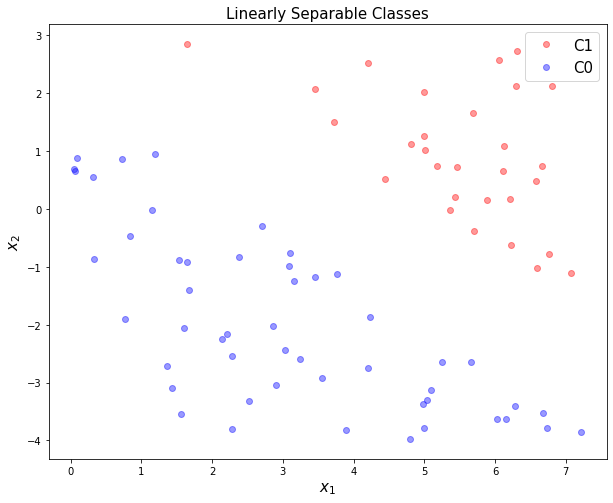

<br><br>
$$ 
\begin{align*}
x &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)}\\ \vdots & \vdots \\ x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad 
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$



Perceptron()

array([-1.])

array([1.])

array([[ 5.61738254, 19.15424854]])

array([-20.])

$$
\begin{align*}
g(x) &= \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0 \\\\
\implies x_2 &= -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$


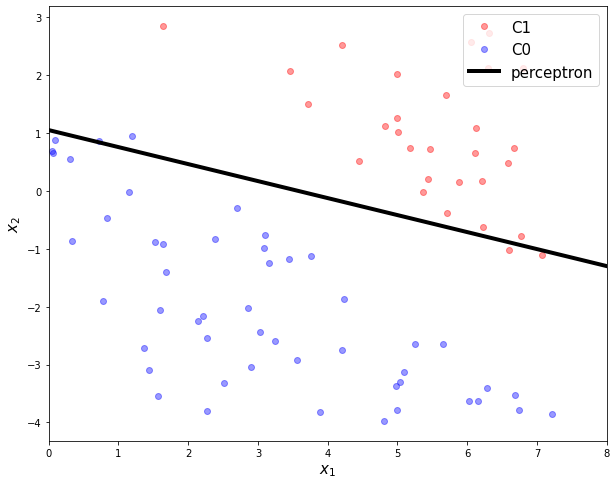

## 2.4. The Best Hyperplane Separator?

- Perceptron finds one of the many possible hyperplanes separating the data if one exists


- Of the many possible choices, which one is the best?


- Utilize distance information


- Intuitively we want the hyperplane having the maximum margin


- Large margin leads to good generalization on the test data
    - we will see this formally when we cover Support Vector Machine


<br>
<center><img src="./image_files/linearly_separable.png" width=350></center>
<br>

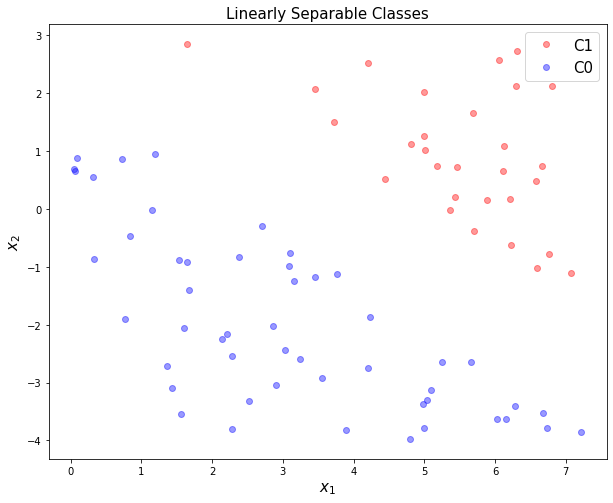

LinearSVC()

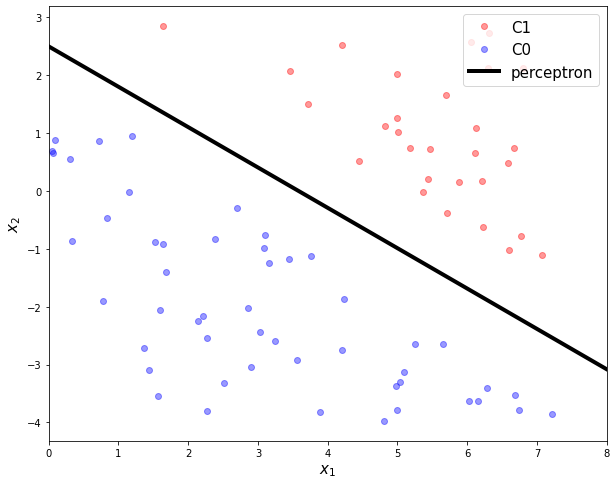

# 3. Logistic Regression

- Logistic regression is a classification algorithm - don't be confused


## 3.1. Distance from a Line

<br><br>
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2\end{bmatrix}, \, x = \begin{bmatrix}x_1\\x_2\end{bmatrix} \; \implies g(x) = \omega_0 + \omega^Tx = \omega_0 + \omega_1x_1 + \omega_2x_2 $$

<br><br>
<center><img src="./image_files/dist_line.png" width = 300></center>
<br>

- For any vector of $x$

<br>
$$ \; h = \frac{g(x)}{\lVert \omega \rVert} \implies\; \text{orthogonal signed distance from the line}$$

## 3.2. Using all Distances


- Perceptron: make use of sign of data

- We want to use _distance information of all data points_ $\rightarrow$ logistic regression

<br><br>
<center><img src="./image_files/logistic_regression_distance.png" width=500></center>
<br><br>

- Basic idea: to find the decision boundary (hyperplane) of $g(x)=\omega^T x =0$ such that maximizes $\prod_i \lvert h_i \rvert$
    - Inequality of arithmetic and geometric means
$$ \frac{h_1+h_2}{2} \geq \sqrt{h_1 h_2} $$ 
 and that equality holds if and only if $h_1 = h_2$


- Roughly speaking, this optimization of $\max \prod_i \lvert h_i \rvert$ tends to position a hyperplane in the middle of two classes

$$h = \frac{g(x)}{\lVert \omega \rVert} = \frac{\omega^T x}{\lVert \omega \rVert} \sim \omega^T x$$

- We link or squeeze $(-\infty, +\infty)$ to $(0,1)$ for several reasons:

<br><br>
<center><img src="./image_files/link_function.png" width=450></center>
<br><br>

- If $\sigma(z)$ is the sigmoid function, or the logistic function<br><br>
$$ \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma \left(\omega^T x \right) = \frac{1}{1+e^{-\omega^T x}}$$<br><br>
 - Logistic function always generates a value between 0 and 1
 - Crosses 0.5 at the origin, then flattens out

 

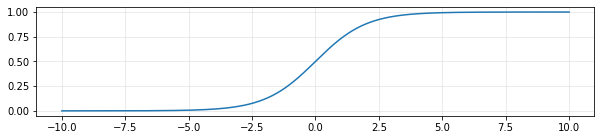

## 3.3. Logistic Regression using Scikit-Learn

<br><br>
$$ 
\begin{align*}
\omega &= \begin{bmatrix}  \omega_1 \\ \omega_2\end{bmatrix}, \qquad \omega_0, \qquad x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots \\\end{bmatrix}, \qquad y  = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

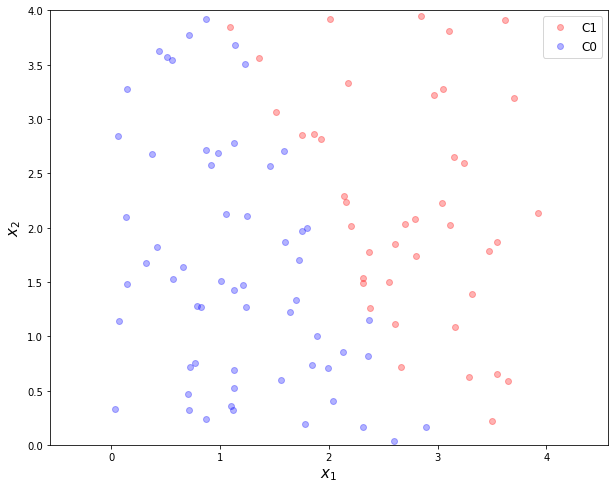

In [18]:
# data generation

plt.figure(figsize = (10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

LogisticRegression()

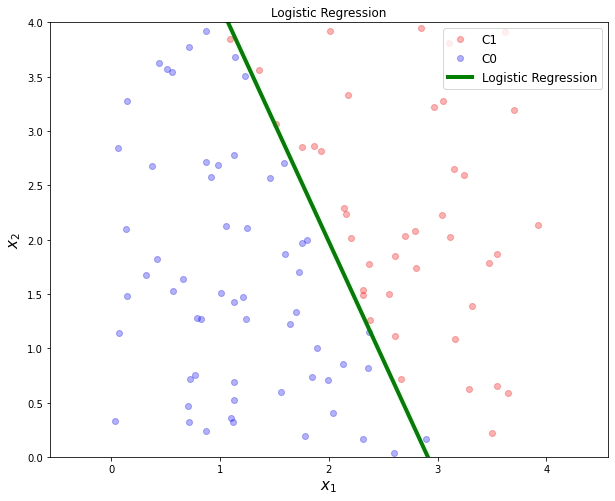

In [20]:


plt.figure(figsize = (10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

# 4. Multiclass Classification

- Generalization to more than 2 classes is straightforward
    - one vs. all (one vs. rest)
    - one vs. one


- Using the soft-max function instead of the logistic function (refer to [UFLDL Tutorial](http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/))
   
   
- Note that the softmax function is often used in deep learning

In [21]:
# !pip install mlxtend

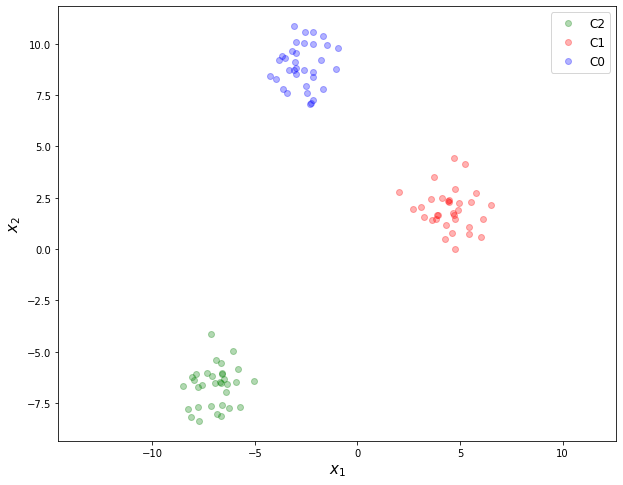

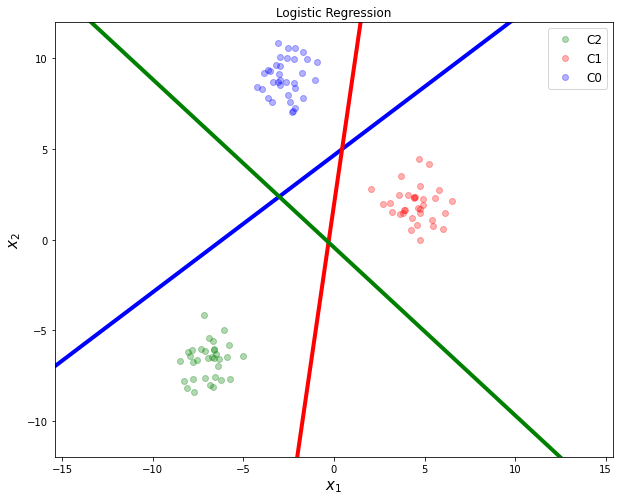

In [28]:


plt.figure(figsize = (10,8))
plt.plot(X[C2,0], X[C2,1], 'go', alpha = 0.3, label = 'C2')
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp0, 'b', linewidth = 4)
plt.plot(xp, yp1, 'r', linewidth = 4)
plt.plot(xp, yp2, 'g', linewidth = 4)
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([-12, 12])
plt.xlim([-12, 12])
plt.show()

# 5. Non-linear Classification

## 5.1. Kernel
- Often we want to capture nonlinear patterns in the data
    - Nonlinear regression: input and output relationship may not be linear
    - Nonlinear classification: classes may note be separable by a linear boundary


- Linear models (e.g. linear regression, linear SVM) are note just rich enough


- Kernels: make linear model work in nonlinear settings
    - By mapping data to higher dimensions where it exhibits linear patterns
    - Apply the linear model in the new input feature space
    - Mapping $=$ changing the feature representation

## 5.2. Classifying non-linear separable data
- Consider the binary classification problem
    - Each example represented by a single feature $x$
    - No linear separator exists for this data

<br><br>
<center><img src="./image_files/nonlinear_1D.png" width = 300></center>

<br><br>
- Now map each example as $x \rightarrow \{x,x^2\}$


- Data now becomes linearly separable in the new representation

<br>
<center><img src="./image_files/linear_2D.png" width = 300></center>

<br><br>

- Linear in the new representation $=$ nonlinear in the old representation


- Let's look at another example
    - Each example defined by a two features $x=\{x_1, x_2\}$
    - No linear separator exists for this data

<br><br>
<center><img src="./image_files/nonlinear_2D.png" width = 300></center>


<br><br>

- Now map each example as $x=\{x_1, x_2\} \rightarrow z=\{x_1^2,\sqrt{2}x_1x_2,x_2^2\}$
    - Each example now has three features (derived from the old represenation)


- Data now becomes linear separable in the new representation

<br><br>
<center><img src="./image_files/linear_3D.png" width = 300></center>

In [29]:
%%html
<center><iframe 
width="420" height="315" src="https://www.youtube.com/embed/3liCbRZPrZA?rel=0" frameborder="0" allowfullscreen>
</iframe></center>

In [30]:
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

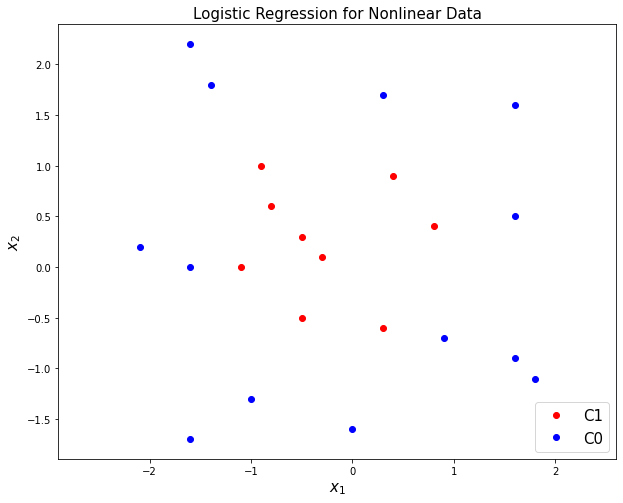

In [31]:
plt.figure(figsize = (10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('Logistic Regression for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.axis('equal')
plt.legend(loc = 4, fontsize = 15)
plt.show()

Use the given kernel

<br><br>
$$
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad \Longrightarrow \quad
z = \phi(x) = \begin{bmatrix} 1\\ \sqrt{2}x_1\\ \sqrt{2}x_2 \\x_1^2 \\ \sqrt{2}x_1 x_2 \\x_2^2 \end{bmatrix}$$

LogisticRegression()

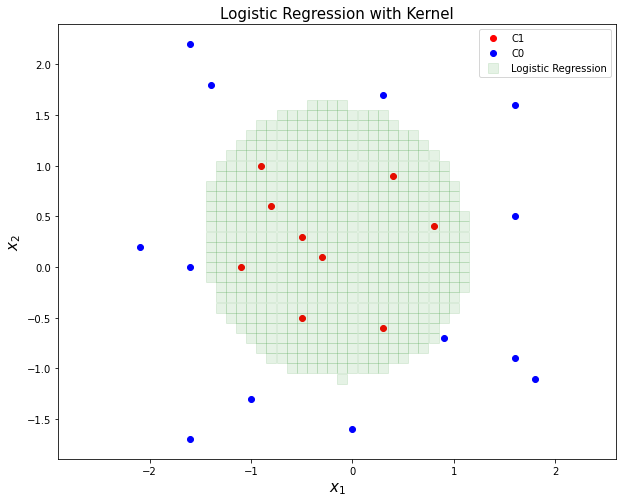

In [37]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>